In [1]:
# Load the data
# Clean the data
# Feature Enginnering
# Preproccessing
# Modelling
# RandomSearching
# GridSearchings
# Final Project Repat

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import (
    StandardScaler,
    RobustScaler,
    MinMaxScaler,
    MaxAbsScaler,
    OneHotEncoder,
    LabelEncoder,
    Normalizer,
)
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,RidgeClassifier,RidgeClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier,XGBRFClassifier
from catboost import CatBoostClassifier,CatBoost
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
np.random.seed(42)

In [3]:
data = pd.read_csv('./data.csv')

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data[' income'].value_counts()

 <=50K    24720
 >50K      7841
Name:  income, dtype: int64

In [6]:
new_income_labels = {
    ' <=50K':0,
    ' >50K':1
}
new_income_list = []
for info in data[' income']:
    new_income_list.append(new_income_labels[info])

In [7]:
data[' income'] = new_income_list

In [8]:
ohe_cols = []
for col_dtype,col_name in zip(data.dtypes,data.columns):
    if col_dtype == 'object':
        ohe_cols.append(col_name)

In [9]:
from sklearn.compose import make_column_transformer

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = data.drop(' income',axis=1)
y = data[' income']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.125)

In [12]:
ohe_cols

[' workclass',
 ' education',
 ' marital-status',
 ' occupation',
 ' relationship',
 ' race',
 ' sex',
 ' native-country']

In [13]:
mct = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),ohe_cols),
    remainder='passthrough'
)
mct.fit(X_train)
X_train = mct.transform(X_train).toarray()
X_test = mct.transform(X_test).toarray()

In [14]:
pres = [StandardScaler(),RobustScaler(),MinMaxScaler(),MaxAbsScaler(),Normalizer(),LabelEncoder()]
label_encoding = False

In [24]:
from sklearn.metrics import precision_score,f1_score,recall_score,accuracy_score,plot_roc_curve,plot_confusion_matrix

In [25]:
import wandb

In [26]:
PROJECT_NAME = 'Income-Clf'

In [33]:
def valid(model,X,y,val=False):
    preds = model.predict(X)
    if val is True:
        results = {
            'Val Precision':precision_score(y_true=y,y_pred=preds),
            'Val F1':f1_score(y_true=y,y_pred=preds),
            'Val Recall':recall_score(y_true=y,y_pred=preds),
            'Val Accuracy':accuracy_score(y_true=y,y_pred=preds),
        }
    else:
        results = {
            'Precision':precision_score(y_true=y,y_pred=preds),
            'F1':f1_score(y_true=y,y_pred=preds),
            'Recall':recall_score(y_true=y,y_pred=preds),
            'Accuracy':accuracy_score(y_true=y,y_pred=preds),
        }
    return results 
def fit(model,X_train,X_test,y_train,y_test,name):
    wandb.init(project=PROJECT_NAME,name=name)
    model = model
    model.fit(X_train,y_train)
    wandb.log(valid(model,X_train,y_train))
    wandb.log(valid(model,X_test,y_test,True))
    plot_roc_curve(model,X_train,y_train)
    plt.savefig('./img.png')
    wandb.log({'Roc':wandb.Image(cv2.imread('./img.png'))})
    plot_roc_curve(model,X_test,y_test)
    plt.savefig('./img.png')
    wandb.log({'Val Roc':wandb.Image(cv2.imread('./img.png'))})
    plot_confusion_matrix(model,X_train,y_train)
    plt.savefig('./img.png')
    wandb.log({'Confusion Matrix':wandb.Image(cv2.imread('./img.png'))})
    plot_confusion_matrix(model,X_test,y_test)
    plt.savefig('./img.png')
    wandb.log({'Val Confusion Matrix':wandb.Image(cv2.imread('./img.png'))})
    return model

In [34]:
import cv2

wandb: ERROR Control-C detected -- Run data was not synced


wandb: wandb version 0.11.2 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


GradientBoostingClassifier()

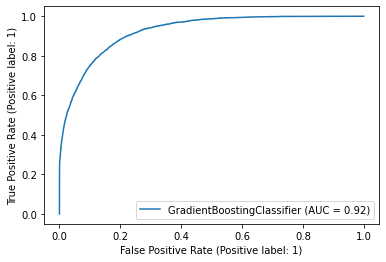

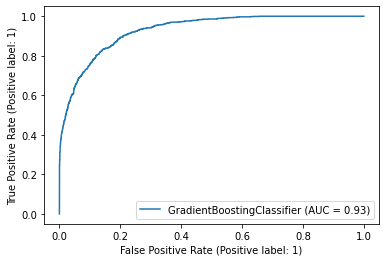

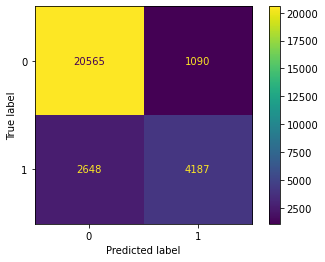

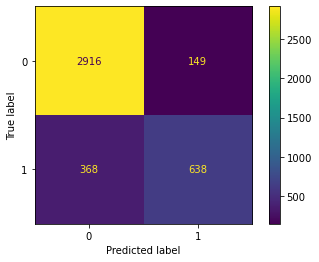

In [36]:
fit(GradientBoostingClassifier(),X_train,X_test,y_train,y_test,f'baseline')

In [40]:
X = data.drop(' income',axis=1)
y = data[' income']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.125)
mct = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),ohe_cols),
    (RobustScaler(),X.drop(ohe_cols,axis=1).columns),
    remainder='passthrough'
)
mct.fit(X_train)
X_train = mct.transform(X_train).toarray()
X_test = mct.transform(X_test).toarray()

In [42]:
models = [
    ['KNeighborsClassifier',KNeighborsClassifier],
    ['LogisticRegression',LogisticRegression],
    ['LogisticRegressionCV',LogisticRegressionCV],
    ['RidgeClassifier',RidgeClassifier],
    ['RidgeClassifierCV',RidgeClassifierCV],
    ['GaussianNB',GaussianNB],
    ['DecisionTreeClassifier',DecisionTreeClassifier],
    ['GradientBoostingClassifier',GradientBoostingClassifier],
    ['AdaBoostClassifier',AdaBoostClassifier],
    ['RandomForestClassifier',RandomForestClassifier],
    ['BaggingClassifier',BaggingClassifier],
    ['SVC',SVC],
    ['XGBClassifier',XGBClassifier],
    ['XGBRFClassifier',XGBRFClassifier],
    ['CatBoostClassifier',CatBoostClassifier],
]

In [44]:
# for model in models:
#     fit(model[1](),X_train,X_test,y_train,y_test,model[0])

In [45]:
from sklearn.model_selection import GridSearchCV

Precision,1.0
F1,0.99993
Recall,0.99985
Accuracy,0.99996
_runtime,7
_timestamp,1628584028
_step,5
Val Precision,0.63636
Val F1,0.61922
Val Recall,0.60297
Val Accuracy,0.81602


Precision,▁
F1,▁
Recall,▁
Accuracy,▁
_runtime,▁▁████
_timestamp,▁▁████
_step,▁▂▄▅▇█
Val Precision,▁
Val F1,▁
Val Recall,▁
Val Accuracy,▁


wandb: wandb version 0.11.2 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


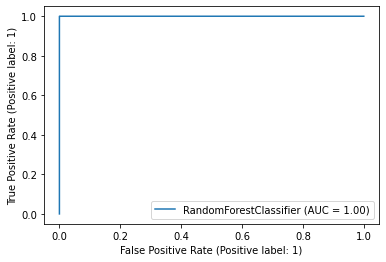

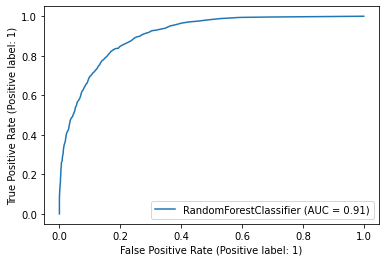

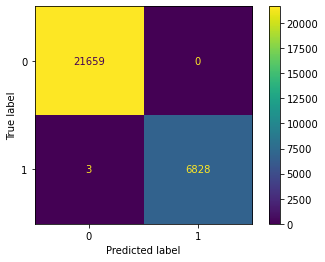

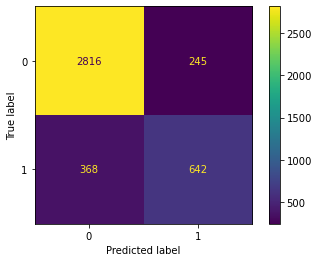

In [53]:
model = RandomForestClassifier()
model = fit(model,X_train,X_test,y_train,y_test,f'Grid Search')
import pickle
pickle.dump(model,open('./model.pkl','wb'))